# Brief

**Project goal:** to identify patterns that determine whether a game succeeds or not. It will allow us to spot potential big winners and plan advertising campaigns.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

**Data description**

- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales` (North American sales in USD million)
- `EU_sales` (sales in Europe in USD million)
- `JP_sales` (sales in Japan in USD million)
- `Other_sales` (sales in other countries in USD million)
- `Critic_Score` (maximum of 100)
- `User_Score` (maximum of 10)
- `Rating` (ESRB)

Data for 2016 may be incomplete.

**Step 1. Open the data file and study the general information**

- Loading all the libraries
- Load data file into DataFrame
- Get info on data
- Getting info about data types

**Step 2. Prepare the data**

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- deal with missing values
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Step 3. Analyze the data**

- Look at how many games were released in different years.
- Look at how sales varied from platform to platform. 
- Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
- Find platforms that used to be popular but now have zero sales.
- Determine what period we should take data for. 
- Disregard the data for previous years.
- Find out which platforms are leading in sales
- Find out which ones are growing or shrinking
- Select several potentially profitable platforms
- Build a box plot for the global sales of all games, broken down by platform. 
- Take a look at how user and professional reviews affect sales for one popular platform. 
- Build a scatter plot and calculate the correlation between reviews and sales. 
- Compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. 

**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), determine:

- The top five platforms. 
- The top five genres. 

**Step 5. Test the following hypotheses:**

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

**Step 6. Write a general conclusion**


## Open the data file and study the general information

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st


!pip install squarify
import matplotlib.pyplot as plt
import squarify

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load data file into DataFrame

data = pd.read_csv('/datasets/games.csv')

In [3]:
# Let's see how many rows and columns our dataset has

data.shape

(16715, 11)

In [4]:
# First 10 rows of data

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


We need to replace the column names (make them lowercase)

In [5]:
# Get info on data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We can see missing values in `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating`

In [6]:
# Getting info about data types

data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

We need to convert `User_Score` datatype from 'object' to 'float64', and `Year_of_Release` from 'float64' to 'int'

In [7]:
# Let's check unique values in 'User_Score'

data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
data[data['User_Score']=='tbd']['User_Score'].count()

2424

In [9]:
# To change the date type to numeric, we need to get rid of the 'tbd' values. 
# Let's see the destribution in 'User_Score'

data[data['User_Score']=='tbd']['Year_of_Release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

In [10]:
# It's best to change these values to 0, but first we need to see how many 0s occur in 'User_Score'.

data[data['User_Score']=='0']['User_Score'].count()

1

In [11]:
# We need to replace 'tbd' values to 0. So we can change the date type to numeric in the next step.

data["User_Score"] = data["User_Score"].replace(['tbd'],np.nan)

data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [12]:
# Check duplicates in data

data.duplicated().sum()

0

## Prepare the data

In [13]:
# Replace the column names (make them lowercase)

data.columns= data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [14]:
#Convert the data to the required type

data['user_score'] = pd.to_numeric(data['user_score'])
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [15]:
#Count the percentage of missing values

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'columns': list(data.columns),
                                   'percent_missing': list(percent_missing)})
print(missing_value_data)

            columns  percent_missing
0              name         0.011965
1          platform         0.000000
2   year_of_release         1.609333
3             genre         0.011965
4          na_sales         0.000000
5          eu_sales         0.000000
6          jp_sales         0.000000
7       other_sales         0.000000
8      critic_score        51.319174
9        user_score        54.591684
10           rating        40.478612


In [16]:
# Check missing values in `name`

data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We have missing values in just two rows. This number is insignificant for the entire dataset, so we can drop it.

In [17]:
# Drop missing values
initial_data = data.copy()

data = data.dropna(subset=['name'])
data.reset_index(drop=True)
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
# Check missing values in `genre`

data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


The missing data in `name` and `genre` were symmetrical, so they've already been removed too.

In [19]:
# Check missing values in `year_of_release`

data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In `year_of_release`, less than 2% of values are missing, so we can drop them.

In [20]:
# Drop missing values

data = data.dropna(subset=['year_of_release'])
data.reset_index(drop=True)
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [21]:
#Let's see if missimg values in 'critic_score', 'user_score' and 'rating' are symmetric

data[(data['critic_score'].isnull())  
     & (data['user_score'].isnull()) 
     & (data['rating'].isnull())].shape[0]

6580

In [22]:
data['critic_score'].isnull().sum()

8461

In [23]:
data['user_score'].isnull().sum()

8981

In [24]:
data['rating'].isnull().sum()

6676

The amount of missing values is highly consistent. It means that for certain films, all rating data has been missed. More than 40% of the values are missing in each column. It is a significant amount, so we cannot delete this data. We will leave them as is.

In [25]:
# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Analyze the data

In [26]:
# Look at how many games were released in different years

pd.DataFrame(data.groupby('year_of_release')['name'].count()).sort_values('year_of_release', ascending=False)

,name
year_of_release,
2016.0,502
2015.0,606
2014.0,581
2013.0,544
2012.0,653
2011.0,1136
2010.0,1255
2009.0,1426
2008.0,1427


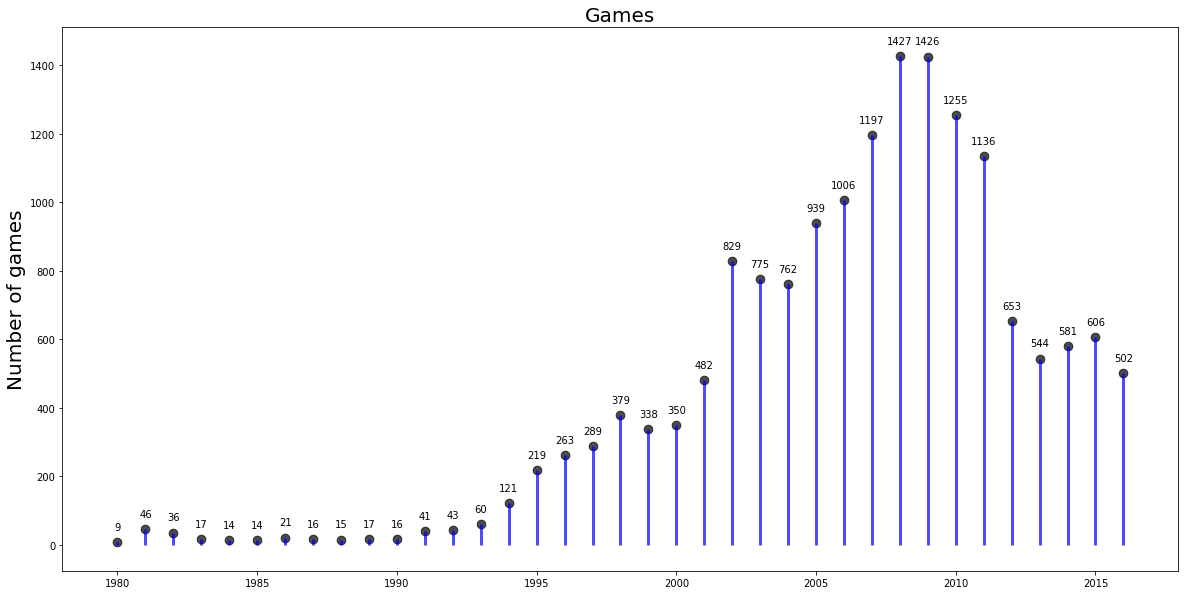

In [27]:
df = data[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by = 'year_of_release').reset_index()
df['year_of_release'] = df['year_of_release'].astype(int)
fig,ax=plt.subplots(figsize=(20,10))
ax.vlines(x=df['year_of_release'], ymin=0, ymax=df.name, color='blue', alpha=0.7, linewidth = 3)
ax.scatter(x=df['year_of_release'], y=df.name, s=75, color = 'black', alpha=0.7)
ax.set_title('Games', fontsize=20)
ax.set_ylabel('Number of games', fontsize=20)


for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2), horizontalalignment='center', verticalalignment = "bottom")

We see that after 1993 the number of games released per year began to rise. The next jump was observed in 2002 and continued until 2011. After that, the number of released games per year began to decline and almost halved. On the given plot, we may see that the best years of the game industry were in 2007 - 2011.

In [28]:
# Look at how sales varied from platform to platform

pd.DataFrame(data.groupby('platform')['total_sales'].count()).sort_values('total_sales', ascending=False)

,total_sales
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


The platforms on which the most games were released are 'PS2', 'DS', 'PS3'. The platforms with the fewest releases are 'GG', 'PCFX', 'TG16'.

In [29]:
# Choose the platforms with the greatest total sales and build a distribution based on data for each year

data_1 = data[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
data_1

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [30]:
# Let's see how far every platforms' total sales from the mean of total sales

data_1['sales_z'] = (data_1['total_sales']-data_1['total_sales'].mean())/data_1['total_sales'].std()
data_1

,platform,total_sales,sales_z
0,PCFX,0.03,-0.826577
1,GG,0.04,-0.826548
2,3DO,0.10,-0.826373
3,TG16,0.16,-0.826199
4,WS,1.42,-0.822536
5,NG,1.44,-0.822477
6,SCD,1.86,-0.821256
7,DC,15.95,-0.780292
8,GEN,28.35,-0.744240
9,SAT,33.59,-0.729006


In [31]:
# Create a new column. If we have negative 'sales_z', we will have a 'red', and positive - 'green'

data_1['color'] = ['red' if x<0 else 'green' for x in data_1['sales_z']]
data_1

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.826577,red
1,GG,0.04,-0.826548,red
2,3DO,0.10,-0.826373,red
3,TG16,0.16,-0.826199,red
4,WS,1.42,-0.822536,red
5,NG,1.44,-0.822477,red
6,SCD,1.86,-0.821256,red
7,DC,15.95,-0.780292,red
8,GEN,28.35,-0.744240,red
9,SAT,33.59,-0.729006,red


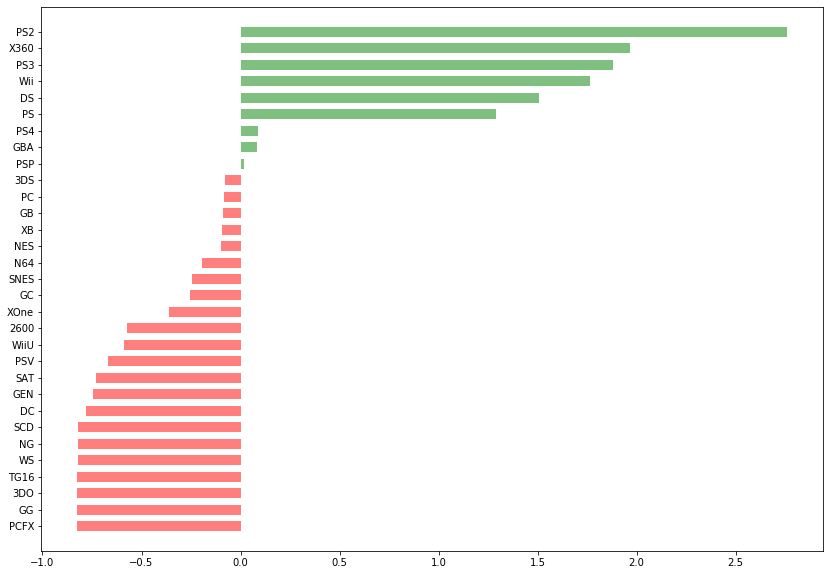

In [32]:
# Let's make a plot

plt.figure(figsize=(14,10))
plt.hlines(y=data_1['platform'], xmax=data_1['sales_z'], xmin=0, color=data_1['color'], alpha=0.5, linewidth=10)
plt.show()

Here we can see how sales varied from platform to platform. The platforms with the greatest total sales have green lines in our graph.

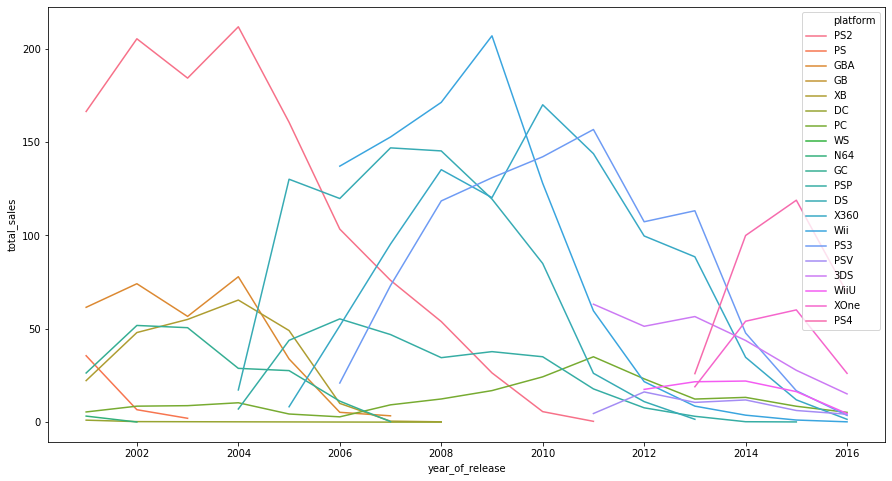

In [33]:
# Let's find platforms that used to be popular but not have zero sales
# Let's leave only games released after 2000

data_temp = data.query('year_of_release > 2000')

data_temp = data_temp.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=data_temp, x='year_of_release', y='total_sales', hue='platform')
plt.show()


We can see that the older platforms have the longer revenue because they didn't have the concurantios as new platforms have. So platforms of 2004-2006 years have very long life spend. For example, PSP was existing from 2004 to 2015: 11 years.

After slicing the data, we can see that for the recent period, the most selling platforms are PS4, XOne, PS3, 3DS, and X360. However, PS3 and X360 will give their positions to the new versions PS4 and XOne. 

In [34]:
# Build a box plot for the global sales of all games, broken down by platform

# game_data = data.groupby('platform').agg({'name':'count', 'total_sales': 'sum'}).reset_index().sort_values(by = 'name')
# print(game_data)

# print(data.groupby('platform').agg({'name':'count', 'total_sales': 'mean'}).reset_index().sort_values(by = 'total_sales'))

# games_grouped = data.groupby(['platform', 'name']).agg({'total_sales': 'sum'}).reset_index().sort_values(by = 'name')

# print(games_grouped)


# plt.scatter(game_data['platform'], game_data['name'], c='red')
# plt.show()

The most significant number of games in the last years was released on PS4. As a result, this platform also has the highest mean revenue. Games for XOne are cheaper, and it has lower revenue in total. 

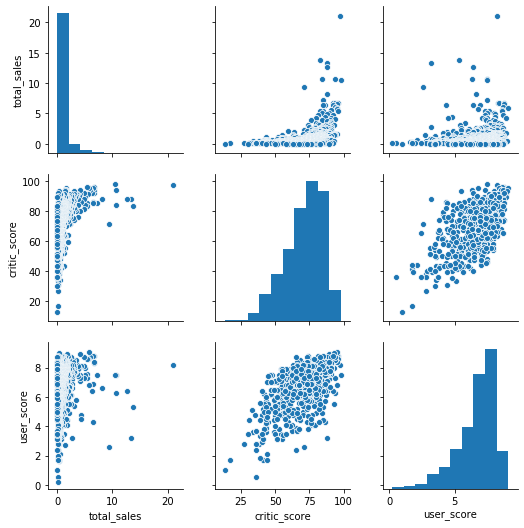

In [35]:
# Take a look at how user and professional reviews affect sales for PS3
# Build a scatter plot and calculate the correlation between reviews and sales

ps3 = data[data['platform']=='PS3']
ps3 = ps3[ps3['user_score'].notnull()]
ps3 = ps3[['total_sales','critic_score','user_score']]
# ps3.head()

for_scatter_ps3=ps3[['total_sales','critic_score','user_score']]
for_scatter_ps3

sns.pairplot(for_scatter_ps3)
plt.show()

In [36]:
# Let's see the correlations of these parameters

for_scatter_ps3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428213,0.128416
critic_score,0.428213,1.000000,0.631154
user_score,0.128416,0.631154,1.000000


There is a definite correlation: the higher the rating of critics and users, the higher the total sales revenue. 

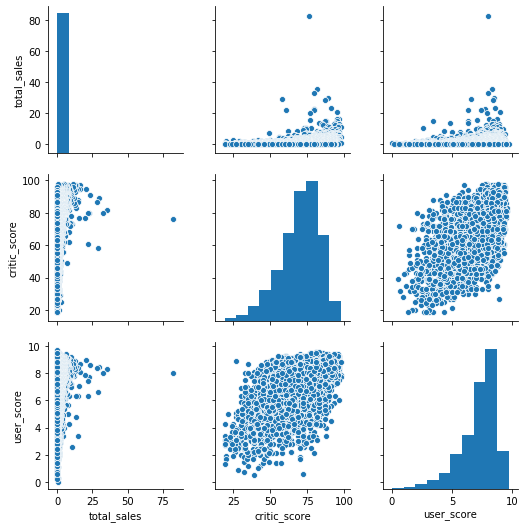

In [37]:
non_ps3 = data[data['platform']!='PS3']
non_ps3 = non_ps3[non_ps3['user_score'].notnull()]
non_ps3 = non_ps3[['total_sales','critic_score','user_score']]
# ps3.head()

for_scatter_non_ps3=non_ps3[['total_sales','critic_score','user_score']]
for_scatter_non_ps3

sns.pairplot(for_scatter_non_ps3)
plt.show()

In [38]:
# Let's see the correlations of these parameters

for_scatter_non_ps3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.216046,0.088840
critic_score,0.216046,1.000000,0.578435
user_score,0.088840,0.578435,1.000000


We can see that sales are much less dependent on either scores for the other platforms.

In [39]:
# Take a look at the general distribution of games by genre

pd.DataFrame(data.groupby('genre')['total_sales'].mean()).sort_values('total_sales', ascending=False)

,total_sales
genre,
Platform,0.940262
Shooter,0.803519
Role-Playing,0.628683
Racing,0.590122
Sports,0.567940
Fighting,0.528865
Action,0.519057
Misc,0.459204
Simulation,0.452695


We can see that the most successful genre is Platform, and the less successful is Adventure — people are more interested in games with physical challenges, including hand-eye coordination and reaction time.



## Create a user profile for each region

For each region (NA, EU, JP), we need to determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

**For each region (NA, EU, JP), determine top five platforms**

In [40]:
initial_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [49]:
# feature = "platform"
# region = 'NA'
initial_data['rating'] = initial_data['rating'].fillna('NaN')
def make_user_profile(feature, region):
    region_adjusted = f'{region.lower()}_sales'

    region_feature_data = initial_data[[feature, region_adjusted]].groupby(feature).sum().sort_values(by=region_adjusted, ascending = False).reset_index().head()
    print(region)
    print(region_feature_data)
    plt.pie(x=region_feature_data[region_adjusted], labels = region_feature_data[feature], autopct='%.0f%%')
    plt.show()

NA
  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40


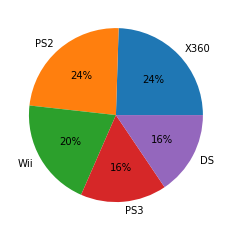

JP
  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67


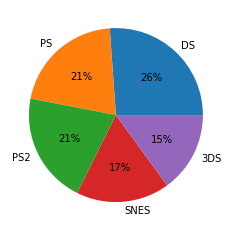

EU
  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61


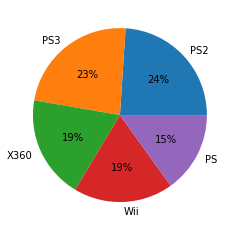

NA
      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27


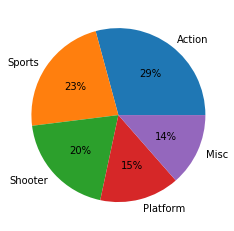

JP
          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11


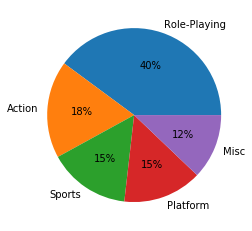

EU
     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74


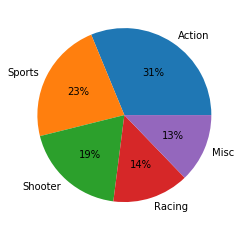

NA
  rating  na_sales
0      E   1292.99
1    NaN   1242.46
2      T    759.75
3      M    748.48
4   E10+    353.32


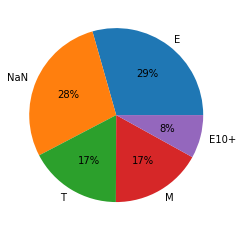

JP
  rating  jp_sales
0    NaN    841.96
1      E    198.11
2      T    151.40
3      M     64.24
4   E10+     40.20


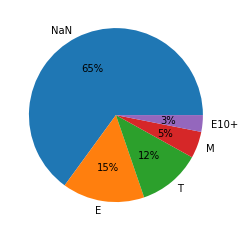

EU
  rating  eu_sales
0      E    710.25
1    NaN    613.83
2      M    483.97
3      T    427.03
4   E10+    188.52


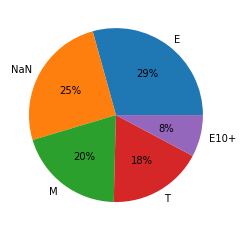

In [50]:
for feature in ['platform', 'genre', 'rating']:
    for region in ['NA', 'JP', 'EU']:
        make_user_profile(feature, region)

## Test the hypotheses

Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

Now we test the following hypotheses:

- H0 - Average user ratings of the Xbox One and PC platforms are the same
- H1 - Average user ratings of the Xbox One and PC platforms are not the same

In [43]:
ratings_xone = data[data['platform']=='XOne'][data['user_score'].notnull()]
ratings_pc = data[data['platform']=='PC'][data['user_score'].notnull()]

st.levene(ratings_xone['user_score'], ratings_pc['user_score'], center='mean')
# the sample groups do not have equal variance, the test rejects, so we will use equal_var = False
# this allso makes sense here because its diffrent dataframes!

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


LeveneResult(statistic=3.090637442082185, pvalue=0.07907112654330054)

In [44]:
alpha = 0.05 # critical statistical significance level, 
# if the p-value is less than alpha, we reject the hypothesis
# null hypothesis is always that things we compare are equal. 

result1 = st.ttest_ind(
        ratings_xone['user_score'], 
        ratings_pc['user_score'], equal_var = False)

print('p-value: ', result1.pvalue)

if (result1.pvalue < alpha):
        print("We reject the null hypothesis") 
else:
        print("We can't reject the null hypothesis")
        
# general mean 
xone_mean = ratings_xone['user_score'].mean() 
pc_mean = ratings_pc['user_score'].mean() 
print('xone mean:', xone_mean) 
print('pc mean:', pc_mean)

# so we understand they are different, like we thought

p-value:  4.5385802963771776e-06
We reject the null hypothesis
xone mean: 6.521428571428572
pc mean: 7.065960264900661


It means that we can't reject that the average user ratings of the Xbox One and PC platforms are the same. But, at the same time, we can't reject that average user ratings of the Xbox One and PC platforms are not the same.

Now we test the following hypotheses:

- H0 - Average user ratings for the Action and Sports genres are same
- H1 - Average user ratings for the Action and Sports genres are different

In [45]:
ratings_action = data[data['genre']=='Action'][data['user_score'].notnull()]
ratings_sports = data[data['genre']=='Sports'][data['user_score'].notnull()]

st.levene(ratings_action['user_score'], ratings_sports['user_score'], center='mean')
# the sample groups do not have equal variance, the test rejects, so we will use equal_var = False
# this allso makes sense here because its diffrent dataframes!

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


LeveneResult(statistic=22.37365889756191, pvalue=2.352586220971042e-06)

In [46]:
alpha = 0.05

result1 = st.ttest_ind(
        ratings_action['user_score'], 
        ratings_sports['user_score'], equal_var = False)

print('p-value: ', result1.pvalue)

if (result1.pvalue < alpha):
        print("We reject the null hypothesis") 
else:
        print("We can't reject the null hypothesis")
        
# general mean 
action_mean = ratings_action['user_score'].mean() 
sport_mean = ratings_sports['user_score'].mean() 
print('action mean:', action_mean) 
print('sport mean:', sport_mean)

# so we understand they are different, like we thought

p-value:  0.07370217419278534
We can't reject the null hypothesis
action mean: 7.058129175946549
sport mean: 6.951433857539316


It means that we can reject that the average user ratings for the Action and Sports genres are same. But, at the same time, we can't reject that average user ratings for the Action and Sports genres are different.

## General conclusion

The **project goal** was to identify patterns that determine whether a game succeeds or not.

**Step 1. Open the data file and study the general information**

What we did:

- Loaded all the libraries
- Loaded data file into DataFrame
- Got info on data
- Got info about data types

**Step 2. Prepare the data**

What we did:

- Replaced the column names (make them lowercase)
- Converted the data to the required types
- Dealt with missing values
- Calculateed the total sales for each game and put these values in a separate column.

**Step 3. Analyze the data**

What we did:

- Looked at how many games were released in different years.

We figured out that after 1993 the number of films released per year began to rise. The next jump was observed in 2002 and continued until 2011. After that, the number of released games per year began to decline and almost halved. On the given plot, we may see that the best years of the game industry were in 2007 - 2011.

- Looked at how sales varied from platform to platform. 

We found out that the platforms on which the most games were released are 'PS2', 'DS', 'PS3'. The platforms with the fewest releases are 'GG', 'PCFX', 'TG16'.

- Chose the platforms with the greatest total sales and build a distribution based on data for each year. 
- Found platforms that used to be popular but now have zero sales.
- Determine what period we should take data for. 
- Disregard the data for previous years.
- Found out which platforms are leading in sales
- Found out which ones are growing or shrinking
- Selected several potentially profitable platforms
- Built a box plot for the global sales of all games, broken down by platform. 

Wii and X360 had the most significant mean sales. On Wii, X360, PC, and PS3 examples, we can see that platform has a demand on a market for four years on average. In further investigation, we chose to use data on games produced after 2012 since we need to make a prognosis for 2017. After slicing the data, we could see that for the recent period, the most selling platforms are PS4, XOne, PS3, 3DS, and X360. However, PS3 and X360 will give their positions to the new versions PS4 and XOne. 

- Took a look at how user and professional reviews affect sales for one popular platform. 
- Build a scatter plot and calculate the correlation between reviews and sales. 

We found a definite correlation: the higher the rating of critics and users, the higher the total sales revenue. 

- Compared the sales of the same games on other platforms.

We figured out that games sold the worst on PC. And most of the games sold well on three platforms - PS4, PS3, and X360.

- Took a look at the general distribution of games by genre. 

We saw that the most profitable genre is Action, and the less profitable is Puzzle — people are more interested in games with physical challenges, including hand-eye coordination and reaction time.

**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), we determined:

- The top five platforms. 
- The top five genres. 

In NA, the top5 platforms are PS4, XOne, X360, PS3, 3DS. In JP: 3DS, PS3, PSV, PS4, WiiU. In EU: PS4, XOne, X360, PS3, 3DS. Since PS3 is a pretty old platform, its sales do not grow. XOne and PS4 could be considered as the most popular new platforms worldwide. 3DS is also a popular platform, and WiiU is left behind.

The most popular genres in NA are action, shooter, sports, role-playing and misc. In JP, people mostly play role-playing games, action, misc, fighting, and shooter games. On the other hand, EU players prefer action, shooter, sports, role-playing, racing.

According to the total sales examination, we can see that the most popular games have rating M and O ratings. Games with an O rating are most popular in JP. At the same time, the M rating is the most popular in NA and EU regions.

**Step 5. Tested the following hypotheses:**

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

What we figured out:

- We can reject that the average user ratings of the Xbox One and PC platforms are the same. But, at the same time, we can't reject that average user ratings of the Xbox One, and PC platforms are not the same.
- We can't reject that the average user ratings for the Action and Sports genres are the same. But, at the same time, we can't reject that average user ratings for the Action and Sports genres are different.
